# $$Comparison~of~Three~Portfolio~Strategies$$

### Importations:

Importing the libraries we will need:

In [10]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.optimize import minimize

Importating data:

In [11]:
data = pd.read_excel('sbf120_as_of_end_2018.xlsx', sheet_name = 'Data')

### Data cleaning and formatting:

Performing aggregation of price data:

In [13]:
price_df_list = []
for i in tqdm(range(120)):
    price_data = data.iloc[:,3*i:3*i+2]
    price_data.dropna(inplace=True)
    price_data.iloc[:,0] = pd.to_datetime(price_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    price_data.rename(columns = {price_data.columns[0] : 'Date', price_data.columns[1]: price_data.columns[0]}, inplace = True)
    price_data.set_index('Date', inplace = True)
    price_df_list.append(price_data)

agg_price_data = price_df_list[0]
for df in tqdm(price_df_list[1:]):
    agg_price_data = agg_price_data.join(df, how='outer', sort = True)

agg_price_data

100%|██████████| 119/119 [00:00<00:00, 444.72it/s]


,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,65.20,6.28,21.1225,83.08,40.2799,NaN,145.441,15.1940,39.650,5.642,...,30.1261,NaN,52.0002,15.6662,70.36,51.1749,7.739,24.585,NaN,26.4957
2011-01-03,65.41,6.29,21.3261,85.50,41.3097,NaN,147.799,15.4988,40.590,5.672,...,30.6517,NaN,52.3960,15.7219,71.13,51.4648,8.081,24.700,NaN,26.8603
2011-01-04,66.54,6.28,21.3770,85.04,41.0176,NaN,146.669,15.5635,41.130,5.711,...,30.2093,NaN,52.0485,15.7191,69.90,51.2522,8.096,25.090,NaN,27.2288
2011-01-05,66.51,6.29,21.6896,84.66,40.4730,NaN,144.900,15.6651,41.290,5.669,...,30.4513,NaN,51.4500,16.0007,68.90,52.0833,8.287,25.000,NaN,27.1047
2011-01-06,67.56,6.30,21.6920,84.57,39.9878,NaN,143.721,15.8128,41.550,5.689,...,30.4778,NaN,51.5465,15.8669,68.74,51.3198,8.406,25.450,NaN,27.1861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,23.72,524.20,33.2700,399.50,93.7500,11.88,73.580,33.8600,37.100,49.155,...,45.7400,19.47,111.5500,9.9900,184.55,170.0000,37.920,138.700,75.99,43.5800
2021-09-02,23.76,532.60,33.2000,400.15,92.9800,11.86,72.250,32.4000,37.580,49.020,...,45.5000,19.33,111.1000,9.7000,186.05,170.9000,37.935,139.900,75.01,43.3600
2021-09-03,23.28,531.00,32.9700,394.85,91.1400,11.68,70.140,31.5800,37.265,48.790,...,45.1800,19.09,111.3500,9.6100,183.70,168.6000,37.900,139.800,72.39,43.6600


Performing missing value imputation in the aggregated price data using the backward fill method:

In [14]:
agg_price_data.loc['2017-01-02':].fillna(method = 'bfill')

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,29.69,61.20,39.910,173.45,64.65,14.30,226.50,26.0238,48.800,14.584,...,76.9033,25.620,93.62,19.640,103.35,80.4624,10.805,67.74,26.775,43.1989
2017-01-03,30.00,60.67,39.640,170.15,65.35,14.30,222.60,25.6774,48.930,14.466,...,77.6973,25.665,93.59,19.315,103.20,80.7999,10.540,67.31,26.770,42.7067
2017-01-04,30.45,60.36,39.240,169.85,64.91,14.30,223.15,25.3818,48.905,14.556,...,77.1302,26.690,93.31,19.340,103.40,79.9463,10.415,66.93,26.555,42.6206
2017-01-05,30.19,60.52,39.570,170.30,65.14,14.30,224.10,25.5481,48.930,14.578,...,77.1302,26.665,93.39,19.460,103.80,80.2242,10.395,67.00,26.420,43.0412
2017-01-06,30.30,60.82,39.695,170.25,65.73,14.30,225.80,25.5296,48.770,14.576,...,77.7351,27.380,92.55,19.550,104.70,79.6187,10.210,67.76,25.785,43.3757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,23.72,524.20,33.270,399.50,93.75,11.88,73.58,33.8600,37.100,49.155,...,45.7400,19.470,111.55,9.990,184.55,170.0000,37.920,138.70,75.990,43.5800
2021-09-02,23.76,532.60,33.200,400.15,92.98,11.86,72.25,32.4000,37.580,49.020,...,45.5000,19.330,111.10,9.700,186.05,170.9000,37.935,139.90,75.010,43.3600
2021-09-03,23.28,531.00,32.970,394.85,91.14,11.68,70.14,31.5800,37.265,48.790,...,45.1800,19.090,111.35,9.610,183.70,168.6000,37.900,139.80,72.390,43.6600


Performing aggregation of market capitalization data:

In [15]:
mkt_cap_df_list = []
for i in tqdm(range(120)):
    mkt_cap_data = data.iloc[:,[3*i,3*i+2]].copy()
    mkt_cap_data.dropna(inplace=True)
    mkt_cap_data.iloc[:,0] = pd.to_datetime(mkt_cap_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    mkt_cap_data.rename(columns = {mkt_cap_data.columns[0] : 'Date', mkt_cap_data.columns[1]: mkt_cap_data.columns[0]}, inplace = True)
    mkt_cap_data.set_index('Date', inplace = True)
    mkt_cap_df_list.append(mkt_cap_data)
        
agg_mkt_cap_data = mkt_cap_df_list[0]
for df in tqdm(mkt_cap_df_list[1:]):
    agg_mkt_cap_data = agg_mkt_cap_data.join(df, how='outer', sort = True)

agg_mkt_cap_data

100%|██████████| 119/119 [00:00<00:00, 426.33it/s]


,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,2074.1424,640.6889,1224.8148,49784.4831,22463.6902,NaN,13574.0125,528.1141,93138.4018,6750.9914,...,2782.3078,NaN,3305.5440,2584.3429,18592.8190,2603.4359,7045.2320,785.1392,NaN,1770.6669
2011-01-03,2080.8229,641.5386,1236.6203,51234.6330,23037.9831,NaN,13794.1317,538.7085,95346.4749,6786.8882,...,2830.8446,NaN,3330.7022,2593.5398,18796.2935,2618.1862,7356.5732,788.8118,NaN,1795.0327
2011-01-04,2116.7705,640.6889,1239.5716,50958.9847,22875.0827,NaN,13688.6579,540.9557,96614.9424,6833.5541,...,2789.9899,NaN,3308.6121,2593.0800,18471.2627,2607.3693,7370.2285,801.2667,NaN,1819.6576
2011-01-05,2115.8161,641.3687,1257.7014,50731.2752,22571.3701,NaN,13523.5686,544.4872,96990.7846,6783.2985,...,2812.3359,NaN,3270.5679,2639.5246,18207.0100,2649.6536,7544.1062,798.3925,NaN,1811.3629
2011-01-06,2149.2187,642.3883,1257.8420,50677.3440,22317.5758,NaN,13413.5090,549.6239,97601.5282,6807.2297,...,2814.7802,NaN,3276.7041,2617.4519,18164.7296,2610.8110,7652.4383,812.7636,NaN,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,819.8323,48320.8556,3459.1215,222789.8633,56029.0137,4800.7512,10197.7771,3575.3571,97959.9281,65402.6198,...,5031.0874,880.8597,8559.9539,937.9261,48329.3191,8589.5157,34554.1988,4765.8506,21312.5103,2446.1334
2021-09-02,821.2148,49095.1692,3451.8435,223152.3500,55568.8288,4792.6692,10013.4466,3421.1922,99227.3342,65222.9971,...,5004.6891,874.5258,8525.4225,910.6991,48722.1340,8634.9896,34567.8674,4807.0836,21037.6549,2433.7848
2021-09-03,804.6246,48947.6809,3427.9301,220196.6897,54469.1660,4719.9305,9721.0123,3334.6065,98395.5989,64916.9733,...,4969.4912,863.6678,8544.6066,902.2493,48106.7241,8518.7785,34535.9740,4803.6475,20302.8375,2450.6237


Defining a function to identify missing data:

In [16]:
def missing_data(col):
    if len(col[col.isnull()].index) == 0:
        return np.nan
    else :
        return col[col.isnull()].index

Processing market capitalization data for each ticker:

In [17]:
for ticker in agg_mkt_cap_data.columns: 
    series = agg_mkt_cap_data[ticker]
    first = series.first_valid_index()
    last = series.last_valid_index()
    series_real = series[(series.index >= first) & (series.index <= last)].fillna(method = 'bfill')
    agg_mkt_cap_data[ticker][(agg_mkt_cap_data[ticker].index >= first) & (agg_mkt_cap_data[ticker].index <= last)] = series_real

Creating a dictionary to store missing data indices for each column in the market capitalization data:

In [18]:
dicti = {}
for i in agg_mkt_cap_data.columns :
    if agg_mkt_cap_data[i].isnull().any() :
        dicti[i] = missing_data(agg_mkt_cap_data[i])
    else : 
        pass

Filling missing values in the market capitalization data with zeros:

In [19]:
agg_mkt_cap_data.fillna(0, inplace = True)

Calculating the percentage change in price data and filling missing values using the backward fill method:

In [20]:
returns = agg_price_data.pct_change().fillna(method='bfill') # set returns to 0 when the stock disappears
returns

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,0.003221,0.001592,0.009639,0.029129,0.025566,0.000000,0.016213,0.020061,0.023707,0.005317,...,0.017447,0.058824,0.007612,0.003555,0.010944,0.005665,0.044192,0.004678,0.000000,0.013761
2011-01-03,0.003221,0.001592,0.009639,0.029129,0.025566,0.000000,0.016213,0.020061,0.023707,0.005317,...,0.017447,0.058824,0.007612,0.003555,0.010944,0.005665,0.044192,0.004678,0.000000,0.013761
2011-01-04,0.017276,-0.001590,0.002387,-0.005380,-0.007071,0.000000,-0.007646,0.004175,0.013304,0.006876,...,-0.014433,0.058824,-0.006632,-0.000178,-0.017292,-0.004131,0.001856,0.015789,0.000000,0.013719
2011-01-05,-0.000451,0.001592,0.014623,-0.004468,-0.013277,0.000000,-0.012061,0.006528,0.003890,-0.007354,...,0.008011,0.058824,-0.011499,0.017915,-0.014306,0.016216,0.023592,-0.003587,0.000000,-0.004558
2011-01-06,0.015787,0.001590,0.000111,-0.001063,-0.011988,0.000000,-0.008137,0.009429,0.006297,0.003528,...,0.000870,0.058824,0.001876,-0.008362,-0.002322,-0.014659,0.014360,0.018000,0.000000,0.003003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,-0.012490,0.020639,0.014020,0.008075,0.031467,-0.001681,-0.008356,0.031060,-0.006560,0.017597,...,0.040491,-0.002561,-0.007562,0.007564,0.037089,0.019185,0.005436,-0.005735,0.009566,-0.001832
2021-09-02,0.001686,0.016024,-0.002104,0.001627,-0.008213,-0.001684,-0.018076,-0.043119,0.012938,-0.002746,...,-0.005247,-0.007191,-0.004034,-0.029029,0.008128,0.005294,0.000396,0.008652,-0.012896,-0.005048
2021-09-03,-0.020202,-0.003004,-0.006928,-0.013245,-0.019789,-0.015177,-0.029204,-0.025309,-0.008382,-0.004692,...,-0.007033,-0.012416,0.002250,-0.009278,-0.012631,-0.013458,-0.000923,-0.000715,-0.034929,0.006919


### Problem data

Setting a variable N to represent the desired number of stocks in our portfolio:

In [21]:
N = 10 # This value can be modified if desired

Creating a dataset composed only of the N stocks with the largest market capitalization at the end of 2018:

Creating the dataset for the market capitalization of N stocks for the year 2019:

In [22]:
mkt_cap_N = agg_mkt_cap_data[agg_mkt_cap_data.loc['2018-12-31'].nlargest(N).index].loc['2019']

Creating the dataset for the prices of N stocks for the year 2019:

In [23]:
prices_N = agg_price_data[agg_mkt_cap_data.loc['2018-12-31'].nlargest(N).index].loc['2019']

Creating the dataset for the returns of N stocks for the year 2019:

In [24]:
returns_N = returns[agg_mkt_cap_data.loc['2018-12-31'].nlargest(N).index].loc['2019']

Creating the dataset for the returns of N stocks for the year 2017 to determine the covariance matrix of returns:

In [25]:
returns_N_2017 = returns[agg_mkt_cap_data.loc['2018-12-31'].nlargest(N).index].loc['2017']
returns_N_2017

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2017-01-02,0.002205,0.001642,0.000288,0.012224,-0.000318,0.015736,0.010641,-0.003303,-0.000466,-0.002366
2017-01-03,-0.011551,0.002664,-0.019026,0.005910,0.010825,-0.011570,-0.004314,0.026015,-0.009320,0.002372
2017-01-04,-0.008904,-0.000511,-0.001763,0.000000,-0.001575,-0.013313,-0.008025,0.014212,-0.008467,-0.000946
2017-01-05,-0.006457,0.000511,0.002649,-0.000383,0.018927,-0.008044,-0.003339,-0.009236,0.000000,0.000473
2017-01-06,0.012998,-0.003270,-0.000294,-0.020187,0.008359,0.016014,0.006958,0.004339,0.003795,0.004261
...,...,...,...,...,...,...,...,...,...,...
2017-12-21,0.007986,0.008546,0.006690,-0.000823,0.001415,0.018623,0.005387,0.007321,0.006154,0.000935
2017-12-22,-0.011685,-0.003111,-0.006911,-0.004528,-0.004357,-0.013373,0.001004,-0.005372,0.006990,-0.004206
2017-12-27,0.007415,0.001399,0.004283,-0.000414,0.008161,0.006791,0.001003,-0.003654,0.008243,0.001408


### Creating a Strategy class

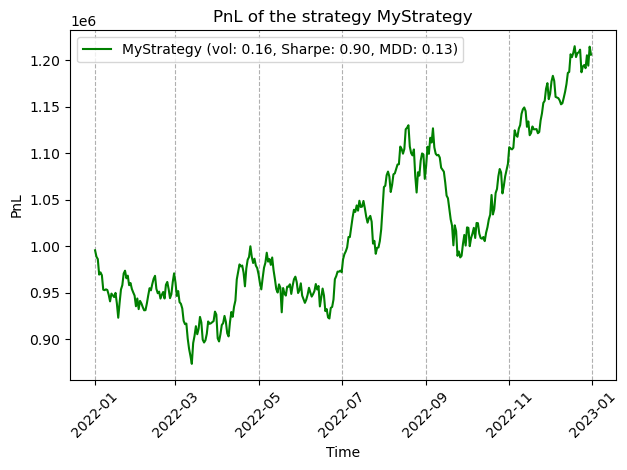

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Strategy:

    def __init__(self, name, returns):
        # Initializes the Strategy object with a name and returns data.
        
        self.name = name
        self.returns = returns
        self.pnl = np.c_[np.array([1000000.]), 1000000.*np.cumprod(1.+self.returns.to_numpy()).reshape(1,-1)].flatten()

    def volatility(self):
        # Computes the volatility of the strategy's returns.
        return np.std(self.returns) * np.sqrt(252)

    def sharpe_ratio(self):
        # Computes the Sharpe ratio of the strategy.
        return np.mean(self.returns) * np.sqrt(252) / np.std(self.returns)

    def max_dd(self):
        # Computes the maximum drawdown (MDD) of the strategy.
        return 1. - np.min(np.flip(np.minimum.accumulate(np.flip(self.pnl))) / self.pnl)

    def max_dd_2(self):
        # Computes an alternate measure of maximum drawdown (MDD) of the strategy.
        return np.max(1. - self.pnl / np.maximum.accumulate(self.pnl))

    def illustrate(self):
        # Illustrates the performance of the strategy by plotting PnL over time.
        fig, ax = plt.subplots(1, 1)
        ax.plot(self.returns.index, self.pnl[1:], 'g', label=self.name + ' (vol: %.2f, Sharpe: %.2f, MDD: %.2f)' %
                                                          (self.volatility(), self.sharpe_ratio(), self.max_dd()))
        ax.set_xlabel('Time')
        ax.set_ylabel('PnL')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.set_title(f'PnL of the strategy {self.name}')
        ax.grid(axis='x', linestyle='--')
        fig.tight_layout()
        fig.savefig(f'{self.name}.pdf')
        plt.show()

# Example usage:
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
returns_data = np.random.normal(loc=0.0005, scale=0.01, size=len(dates))
returns_series = pd.Series(returns_data, index=dates)

my_strategy = Strategy(name="MyStrategy", returns=returns_series)
my_strategy.illustrate()

### Determining the covariance matrix of returns

In [27]:
# Covariance matrix of returns
returns_cov_matrix = returns_N_2017.cov()

# To avoid convergence issues in minimization algorithms,
# we standardize our returns covariance matrix

# Standardizing returns
returns_N_2017_standardized = (returns_N_2017 - returns_N_2017.mean()) / returns_N_2017.std()

# Calculating the standardized covariance matrix
std_returns_cov_matrix = returns_N_2017_standardized.cov()
std_returns_cov_matrix

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
MC FP Equity,1.000000,0.441145,0.471349,0.312139,0.400792,0.595197,0.382170,0.383871,0.306486,0.579105
TTE FP Equity,0.441145,1.000000,0.293156,0.334242,0.325299,0.265576,0.163594,0.451276,0.189822,0.420330
OR FP Equity,0.471349,0.293156,1.000000,0.384091,0.285719,0.314921,0.350154,0.213846,0.331916,0.483274
SAN FP Equity,0.312139,0.334242,0.384091,1.000000,0.331901,0.169881,0.227877,0.332778,0.221466,0.399586
AIR FP Equity,0.400792,0.325299,0.285719,0.331901,1.000000,0.217492,0.219693,0.370402,0.235696,0.489345
KER FP Equity,0.595197,0.265576,0.314921,0.169881,0.217492,1.000000,0.283821,0.188852,0.160021,0.489071
RMS FP Equity,0.382170,0.163594,0.350154,0.227877,0.219693,0.283821,1.000000,0.191750,0.189871,0.314142
BNP FP Equity,0.383871,0.451276,0.213846,0.332778,0.370402,0.188852,0.191750,1.000000,0.184892,0.448631
EL FP Equity,0.306486,0.189822,0.331916,0.221466,0.235696,0.160021,0.189871,0.184892,1.000000,0.255570
AI FP Equity,0.579105,0.420330,0.483274,0.399586,0.489345,0.489071,0.314142,0.448631,0.255570,1.000000


### Creating equally weighted portfolios

Creating the class EQWeighted:

In [28]:
class EQWeighted(Strategy):

    def __init__(self, name, returns):
        # Setting weights to 1/N so that all stocks have the same weight in the Portfolio
        self.weights_EQW = np.ones(N) / N 
        # Calculating returns for equally weighted portfolio
        self.returns_EQW = (returns * self.weights_EQW).sum(axis=1)
        super().__init__(name, self.returns_EQW)

Creating the portfolio by generating an instance of the class:

In [29]:
EQWP = EQWeighted('EQW_2019', returns_N)

The weights of the portfolio:

In [30]:
EQWP.weights_EQW

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Evaluating the performance of our portfolio using class methods:

In [31]:
print(f'The sharpe_ratio of the portfolio is: {EQWP.sharpe_ratio()}')
print(f'The maximum_drawdown of the portfolio is: {EQWP.max_dd()}')

The sharpe_ratio of the portfolio is: 2.1193296068317125
The maximum_drawdown of the portfolio is: 0.07191270295659924


Plotting the PnL graph for the EQW strategy:

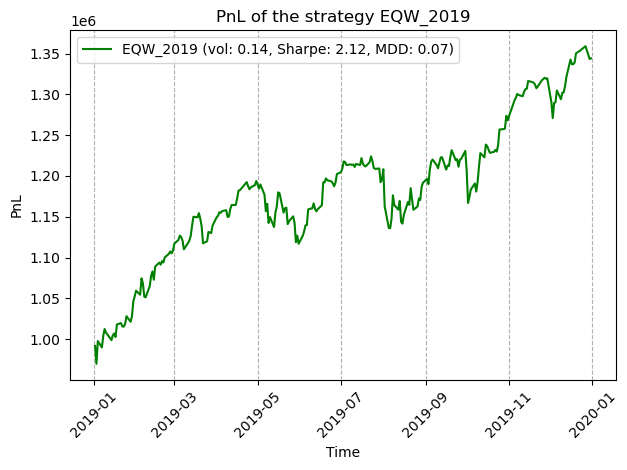

In [32]:
EQWP.illustrate()

### Creating the Markowitz Minimum Variance Portfolio

Implementing the model based on a research paper titled 'Markowitz Mean-Variance Portfolio Theory':

Let $\mu_i=E\left(r_i\right), \mathrm{m}=\left(\mu_1, \mu_2, \ldots, \mu_n\right)^T$, and $\operatorname{cov}(returns_N)=\Sigma$. If $w=$ $\left(w_1, w_2, \ldots, w_n\right)^T$ represents the weights associated to our Portfolio, then the Portfolio return $r=\sum_{i=1}^n r_i w_i$ is a random variable with mean $\mathrm{m}^T w$ and variance $w^T \Sigma w$. If $\mu_b$ represents the acceptable threshold  for the return rate, then according to the Markowitz theory, an optimal portfolio is one that solves the following program:
$$
\begin{array}{lll}
\mathcal{M} & \text { minimize } & \frac{1}{2} w^T \Sigma w \\
& \text { subject to } & \mathrm{m}^T w \geq \mu_b, \text { and } \mathrm{e}^T w=1
\end{array}
$$

Creating a class inheriting from Strategy to address this problem:

In [33]:
class Markowitz_MinVar(Strategy):
    def __init__(self, name, returns):
        # mu_b represents an acceptable threshold for returns
        # Above this value, the solution determined by the algorithm is not optimal
        mu_b = 0.001 
        self.name = name
        self.returns = returns
        m = np.array(self.returns.mean())
        
        # Determining the parameters 'weights' and 'returns' characterizing our Portfolio.
        # For this, we use the minimize function of Scipy to solve the optimization problem:
        
        # Problem constraints
        constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Sum of weights equals 1
                       {'type': 'ineq', 'fun': lambda w: np.dot(m.T, w) - 0.001})  # Second constraint as described in the theory above
        bounds = tuple([(0, 1)] * N)  # Weights are between 0 and 1
        initial_weights = np.ones(N) / N  # Initialize all weights equally

        # Using Scipy's 'minimize' function to solve the optimization problem
        self.MMV_portfolio = minimize(lambda w: (1/2) * np.dot(w.T, np.dot(std_returns_cov_matrix, w)),
                                          initial_weights, bounds=bounds, constraints=constraints)
        
        # Retrieving optimal weights represented by x in min_variance_portfolio
        self.weights_MMV = self.MMV_portfolio.x
        
        # Determining returns_MMV using the weights_MMV we just found
        self.returns_MMV = (returns * self.weights_MMV).sum(axis=1)
        
        # Inheriting attributes of the parent class taking into account returns_MMV
        super().__init__(name, self.returns_MMV)

Creating an instance of the class to generate the portfolio:

In [34]:
MMVP = Markowitz_MinVar('MMV_2019', returns_N)

checking that the minimization works well by looking at the instance variable which models the result of the scipy.minimize() function:

In [35]:
MMVP.MMV_portfolio

     fun: 0.17416341817136993
     jac: array([0.40823113, 0.34855638, 0.3483237 , 0.34787057, 0.34829356,
       0.34838916, 0.34844594, 0.34845381, 0.348261  , 0.395746  ])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.        , 0.10315427, 0.04952732, 0.11506263, 0.10393045,
       0.1659669 , 0.16054158, 0.11850521, 0.18331165, 0.        ])

The following optimal weights are determined:

In [36]:
MMVP.weights_MMV   # weight_MMV is the vector containing the weights for each stock in the Portfolio

array([0.        , 0.10315427, 0.04952732, 0.11506263, 0.10393045,
       0.1659669 , 0.16054158, 0.11850521, 0.18331165, 0.        ])

evaluating our portfolio performance using class methods:

In [37]:
print(f'The sharpe_ratio of the portfolio is: {MMVP.sharpe_ratio()}')
print(f'The maximum_drawdown of the portfolio is: {MMVP.max_dd()}')

The sharpe_ratio of the portfolio is: 1.9792914839688718
The maximum_drawdown of the portfolio is: 0.07334526877548286


The PnL graph for the MMV strategy:

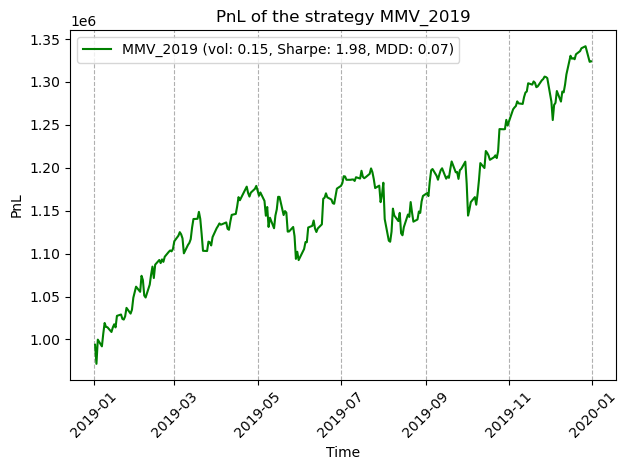

In [38]:
MMVP.illustrate()

### Creating ERC Portfolio

Implementing the following model based on a paper titled "On The Properties Of Equally-Weighted Risk Contributions Portfolios" by Sébastien Maillard, Thierry Roncalli, and Jérôme Teiletche:

$$
\begin{aligned}
y^{\star}= & \arg \min \sqrt{y^{\top} \Sigma y} \\
\text { u.c. } & \left\{\begin{array}{l}
\sum_{i=1}^n \ln y_i \geq c \\
y \geq \mathbf{0}
\end{array}\right.
\end{aligned}
$$
Where $c$ is an arbitrarily fixed constant. In this case, the program is similar to a variance minimization problem subject to a constraint of sufficient weight diversification, akin to the Markowitz minimum variance model where there are some weights that can be zero. We can solve this problem using the SQP optimization algorithm.
$\newline$
Thus, the weights associated with the ERC Portfolio are expressed as:
$$
\begin{aligned}
w_i^{\star}=y_i^* / \sum_{i=1}^n y_i^*
\end{aligned}
$$

Creating a class that inherits from Strategy to solve this problem:

In [39]:
# In order to optimize the convergence of the minimization algorithm, we use the standardized returns covariance matrix

class ERC(Strategy):
    def __init__(self, name, returns):
        
        # Constant c introduced in the theory above
        c = 0.001
        # Initializing equal weights
        initial_weights = np.ones(N) / N
        
        # Constraint for the sum of weights to be equal to 1
        constraints = ({'type': 'ineq', 'fun': lambda y: np.sum(np.log(y)) - c},
                       {'type': 'ineq', 'fun': lambda y: y - 0.0000001}) # The constraint states that w >= 0
                                                                         # To avoid convergence issues related to this constraint
                                                                         # we set an epsilon = 0.0000001 very close to 0.
                    
        # Definition of the objective function
        def objective_function(y):
            return np.sqrt(np.dot(np.dot(y.T, std_returns_cov_matrix), y))
        
        # Solving the optimization problem with Scipy's minimize() function
        self.ERC_portfolio = minimize(objective_function, initial_weights, constraints=constraints)
        
        # Weights determined by the minimize function
        self.y = self.ERC_portfolio.x
        
        # Optimal weights
        self.weights_ERC = self.y / np.sum(self.y)
        
        # Calculating portfolio returns with optimal weights
        self.returns_ERC = (returns * self.weights_ERC).sum(axis=1)
        
        # Calling the constructor of the parent class to initialize attributes
        super().__init__(name, self.returns_ERC)

Creating class instance:

In [40]:
ERCP = ERC('ERC_2019', returns_N)

Checking that the minimization has been successful by inspecting the instance variable that models the result of the scipy.minimize() function:

In [41]:
ERCP.ERC_portfolio

     fun: 6.209604500768091
     jac: array([0.76333565, 0.61624765, 0.6543299 , 0.59684944, 0.61598146,
       0.58310634, 0.5457893 , 0.60074729, 0.51704532, 0.76122361])
 message: 'Optimization terminated successfully'
    nfev: 145
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.81345471, 1.00772021, 0.94902403, 1.04029191, 1.00806722,
       1.06496392, 1.13783887, 1.03354161, 1.2010383 , 0.81571458])

It can be observed that the algorithm solved the minimization problem in 16 iterations (nit = 16) and determined the following optimal weights:

In [42]:
ERCP.weights_ERC   # weight_MMV is the vector containing the weights for each stock in the Portfolio

array([0.08076673, 0.10005507, 0.09422721, 0.10328907, 0.10008953,
       0.10573872, 0.11297437, 0.10261884, 0.11924934, 0.08099111])

Evaluating the performance of our portfolio using class methods:

In [43]:
print(f'The sharpe_ratio of the portfolio is: {ERCP.sharpe_ratio()}')
print(f'The maximum_drawdown of the portfolio is: {ERCP.max_dd()}')

The sharpe_ratio of the portfolio is: 2.100917133020809
The maximum_drawdown of the portfolio is: 0.0709724178686002


The PnL graph for the ERC strategy:

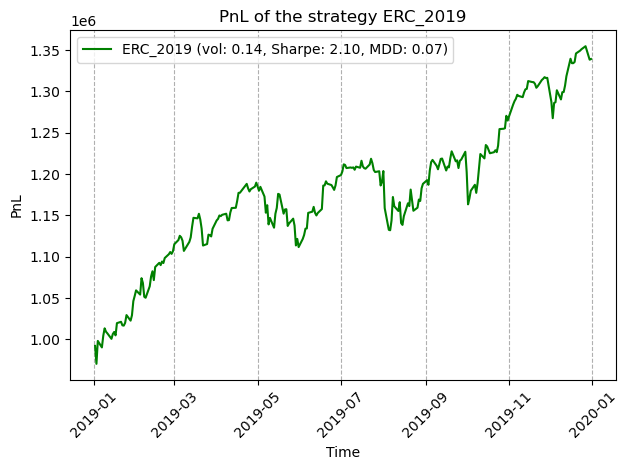

In [44]:
ERCP.illustrate()

### Graph comparing the PnL associated with the three strategies

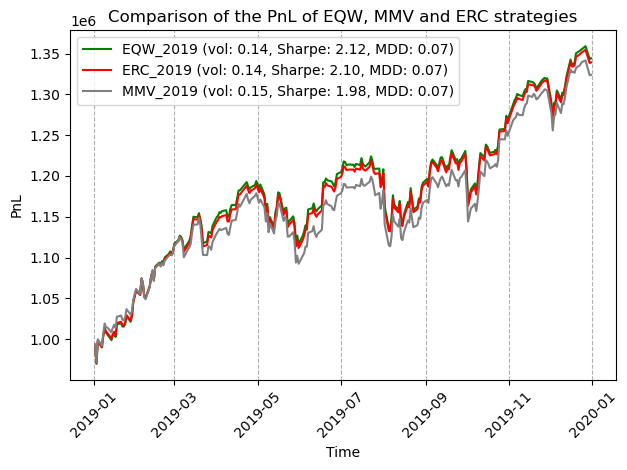

In [46]:
fig, ax = plt.subplots(1, 1)

# Plotting PnL for EQWeighted strategy
ax.plot(EQWP.returns.index, EQWP.pnl[1:], 'g', label=EQWP.name + ' (vol: %.2f, Sharpe: %.2f, MDD: %.2f)' %
                                                    (EQWP.volatility(), EQWP.sharpe_ratio(), EQWP.max_dd()))

# Plotting PnL for Markowitz_MinVar strategy
ax.plot(ERCP.returns.index, ERCP.pnl[1:], 'red', label=ERCP.name + ' (vol: %.2f, Sharpe: %.2f, MDD: %.2f)' %
                                                    (ERCP.volatility(), ERCP.sharpe_ratio(), ERCP.max_dd()))

# Plotting PnL for ERC strategy
ax.plot(MMVP.returns.index, MMVP.pnl[1:], 'grey', label=MMVP.name + ' (vol: %.2f, Sharpe: %.2f, MDD: %.2f)' %
                                                    (MMVP.volatility(), MMVP.sharpe_ratio(), MMVP.max_dd()))

ax.set_xlabel('Time')
ax.set_ylabel('PnL')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_title('Comparison of the PnL of EQW, MMV and ERC strategies')
ax.grid(axis='x', linestyle='--')
fig.tight_layout()

# Save the plot as PDF files
fig.savefig(f'{EQWP.name}.pdf')
fig.savefig(f'{MMVP.name}.pdf')
fig.savefig(f'{ERCP.name}.pdf')

plt.show()